### Goals of this notebook
1. Get the daily stock movement percentage of one stock
2. Plot the daily movement percentage of one stock (Indexed values and the normal curve)
3. Get the daily movement percentages of a few stocks
4. Plot the daily movement percentages of a few stocks

(Note: we will be using the daily mid price to define a stock price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

In [2]:
df = pd.DataFrame()
df = df.from_csv('tsla.csv')

In [3]:
df.describe()

,close,volume,open,high,low
count,1803.000000,1.803000e+03,1803.000000,1803.000000,1803.000000
mean,144.444698,4.439461e+06,144.466594,146.920054,141.847566
std,102.990194,4.281379e+06,103.019791,104.429067,101.438157
min,15.800000,1.184140e+05,16.140000,16.630000,14.980000
25%,30.760000,1.267700e+06,30.605000,31.420000,29.885000
50%,178.560000,3.427251e+06,178.000000,181.730000,173.531000
75%,227.805000,5.963226e+06,227.975000,231.385000,224.120000
max,383.450000,3.710324e+07,386.690000,386.990000,379.345000


### 1)  Get the daily movement percentages of TSLA
(Note: For simplicity, we are assuming that the movement on day 1 is zero)

In [4]:
def get_price_movements(df):
    movement = np.zeros(len(df))
    last_price = -1
    i = 0
    for index, row in df.iterrows():
        if (last_price < 0):
            movement[i] = 0
        else:
            movement[i] = 100 * row['close'] / last_price - 100
    
        last_price = row['close']
        i += 1
    
    return movement

### 2) Plot Stock Movement Percentages

In [5]:
df['Movement'] = get_price_movements(df.sort_index(axis=0))

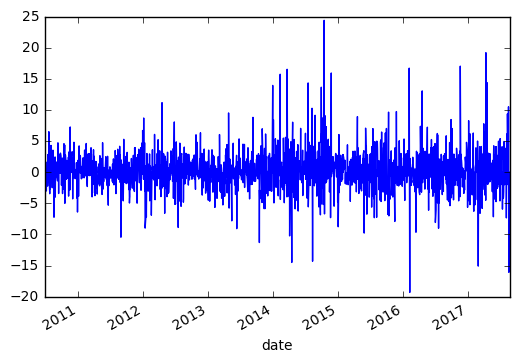

In [6]:
plt.figure()
df['Movement'].plot()
plt.show()

### 3) Plot the kernel density estimate for this stock
(Using the scipy default which is Scott's Rule) More info [here](https://en.wikipedia.org/wiki/Kernel_density_estimation)

In [7]:
def plot_gaussian(x, x_min=-10, x_max=10, n=10000, fill=False):
    ''' 
    Expects an np array of movement percentages, 
    plots the gaussian kernel density estimate
    '''
    ## Learn the kernel-density estimate from the data
    density = stats.gaussian_kde(x)
    
    ## Evaluate the output on some data points
    xs = np.linspace(x_min, x_max, n)
    y = density.evaluate(xs)
    
    ## Create the plot
    plt.plot(xs, y)
    plt.xlabel('Daily Movement Percentage')
    plt.ylabel('Density')
    
    if (fill):
        plt.fill_between(xs, 0, y)

In [8]:
x = df['Movement'].as_matrix()

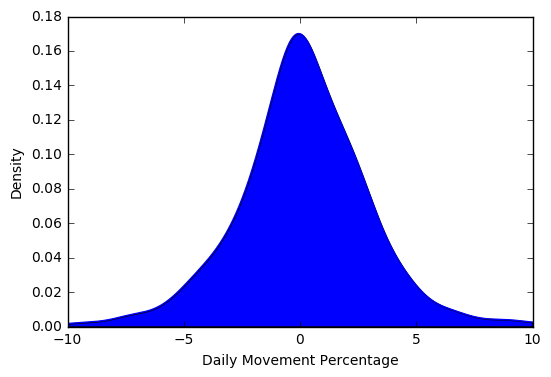

In [9]:
## Plot the output
plot_gaussian(x, fill=True)
plt.show()

In [10]:
print('The average daily change was ' + str(df['Movement'].mean()) ) 
print('The standard deviation is ' + str(df['Movement'].std()) ) 

The average daily change was 0.2016163805575755
The standard deviation is 3.2441875641529663


### 3) Get the daily movement percentages of 20 stocks

In [11]:
g = glob.glob('*.csv')

In [12]:
def ticker_from_csv(csv_string):
    stock_name = csv_string.rsplit('.', 1)[0] ## Peel off the ".csv"
    return stock_name.upper()

AMD
The average daily change was 0.08 percent
The standard deviation is 3.93 percent 

BAC
The average daily change was 0.04 percent
The standard deviation is 3.72 percent 

FB
The average daily change was 0.14 percent
The standard deviation is 2.39 percent 

GOOG
The average daily change was 0.07 percent
The standard deviation is 1.43 percent 

INTC
The average daily change was 0.03 percent
The standard deviation is 1.83 percent 

NKE
The average daily change was 0.07 percent
The standard deviation is 1.80 percent 

NVDA
The average daily change was 0.11 percent
The standard deviation is 3.06 percent 

SBUX
The average daily change was 0.08 percent
The standard deviation is 2.05 percent 

SPY
The average daily change was 0.03 percent
The standard deviation is 1.30 percent 

TSLA
The average daily change was 0.20 percent
The standard deviation is 3.24 percent 



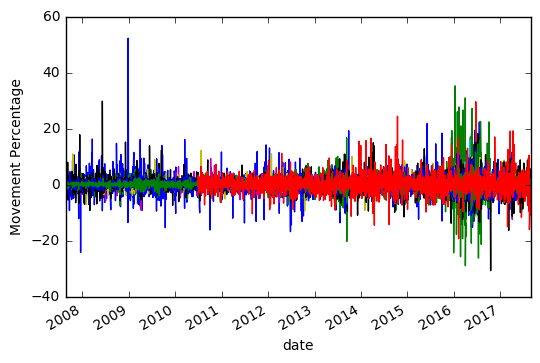

In [13]:
plt.figure()
for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    ticker = ticker_from_csv(g[i])
    print(ticker)

    df['Movement'] = get_price_movements(df.sort_index(axis=0)) ## Google finance data has dates in descending order, we don't want that
    print('The average daily change was ' + "{0:.2f}".format(df['Movement'].mean()) + ' percent') 
    print('The standard deviation is ' + "{0:.2f}".format(df['Movement'].std()) + ' percent \n' ) 
    df['Movement'].plot()

plt.ylabel('Movement Percentage')
plt.show()

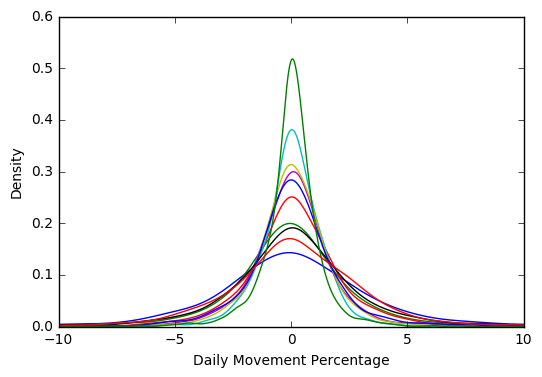

In [14]:
plt.figure()
for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    df['Movement'] = get_price_movements(df.sort_index(axis=0))
    x = df['Movement'].as_matrix()
    plot_gaussian(x)

plt.show()